## gpr
Reference  
https://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# true unknown function
f = lambda x: np.sin(.9*x).flatten()

# GP squared exponential kernel
def kernel(a, b, kernel_param=.5):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * a @ b.T
    return np.exp(-.5 * (1/kernel_param) * sqdist)

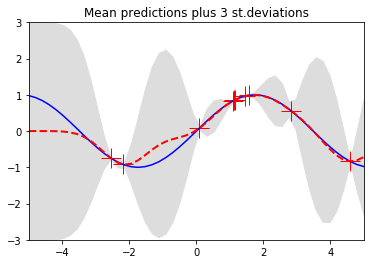

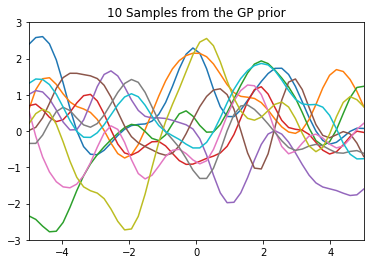

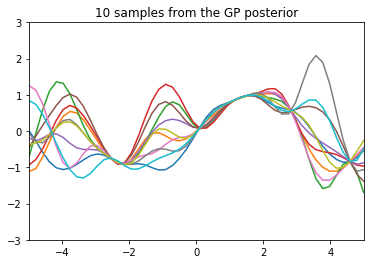

In [5]:
N = 10 # training points
n = 50 # test points
s = .00005 # noise variance

X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N)) # K = np.dot(L, L.T)

Xtest = np.linspace(-5, 5, n).reshape(-1, 1)

# mean
Lk = np.linalg.solve(L, kernel(X, Xtest)) # L.inv @ K*
mu = Lk.T @ np.linalg.solve(L, y) # K*.T @ (LL.T).inv = K.inv @ y

# variance
K_ = kernel(Xtest, Xtest) # K**
# s²= K** - K*.T@K.inv@K*
s2 = np.diag(K_) - np.sum(Lk**2, axis=0) # (Lk)²= (L.inv @ K*)²=K*.T@K.inv@K*
s = np.sqrt(s2)

plt.figure(1)
plt.clf()
plt.plot(X, y, 'r+', ms=20)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color='#dddddd')
plt.plot(Xtest, mu, 'r--', lw=2)
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -3, 3])

''' draw samples from the prior at test points ''' 
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = L @ np.random.normal(size=(n,10))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('10 Samples from the GP prior')
plt.axis([-5, 5, -3, 3])

''' draw samples from the posterior at test points '''
# p(f*|X*,X,f) = N(f*|μ*,Σ*)
L = np.linalg.cholesky(K_ - (Lk.T @ Lk) + 1e-6*np.eye(n))
f_post = mu.reshape(-1, 1) + L @ np.random.normal(size=(n, 10))
plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('10 samples from the GP posterior')
plt.axis([-5, 5, -3, 3])
plt.show()